In [ ]:
!unzip /content/Diabetes-prediction-dataset.zip

Archive:  /content/Diabetes-prediction-dataset.zip
  inflating: diabetes_prediction_dataset.csv  


# ***Import libraries***

In [ ]:

import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
from sklearn.decomposition import PCA
import pickle
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_rows',None)
pd.set_option('display.max_columns',None)
# For Conversion of numerical columns to categorical columns. 
from sklearn.preprocessing import OneHotEncoder
# Model Building 
from sklearn.linear_model import LogisticRegression 
# Metrics Evaluation 
from sklearn.metrics import accuracy_score,classification_report


# ***Read Dataset***

In [ ]:
filepath = '/content/diabetes_prediction_dataset.csv'
df = pd.read_csv(filepath)

In [ ]:
df.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   gender               100000 non-null  object 
 1   age                  100000 non-null  float64
 2   hypertension         100000 non-null  int64  
 3   heart_disease        100000 non-null  int64  
 4   smoking_history      100000 non-null  object 
 5   bmi                  100000 non-null  float64
 6   HbA1c_level          100000 non-null  float64
 7   blood_glucose_level  100000 non-null  int64  
 8   diabetes             100000 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 6.9+ MB


# ***Remove Duplicates in Data***

In [ ]:
duplicated_sum = df.duplicated().sum()
print(f"No of Duplicate rows: {duplicated_sum} ")

No of Duplicate rows: 3854 


In [ ]:
df1 = df.drop_duplicates()
df1.shape

(96146, 9)

In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 96146 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   gender               96146 non-null  object 
 1   age                  96146 non-null  float64
 2   hypertension         96146 non-null  int64  
 3   heart_disease        96146 non-null  int64  
 4   smoking_history      96146 non-null  object 
 5   bmi                  96146 non-null  float64
 6   HbA1c_level          96146 non-null  float64
 7   blood_glucose_level  96146 non-null  int64  
 8   diabetes             96146 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 7.3+ MB


In [ ]:
# Let's check for unique columns in object columns. 

o = (df1.dtypes == 'object')

object_cols = o[o].index 
print(f"Categorical Columns : {object_cols}")

Categorical Columns : Index(['gender', 'smoking_history'], dtype='object')


In [ ]:
def unique_cols(df , object_cols) : 
    
    for i in df[object_cols] : 
        print(f"{i} : {df[i].unique()}") 
        
unique_cols(df1 , object_cols)    

gender : ['Female' 'Male' 'Other']
smoking_history : ['never' 'No Info' 'current' 'former' 'ever' 'not current']


In [ ]:
# Let's check for value counts in gender column. 

df1['gender'].value_counts()

Female    56161
Male      39967
Other        18
Name: gender, dtype: int64

# ***Encode gender and smoking_history Columns***

In [ ]:
# Let's encode gender columns using label encoder. 

from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

df1['gender'] = le.fit_transform(df1['gender'])

In [ ]:
# Check for value count in smoking_history. 

df1['smoking_history'].value_counts()

never          34398
No Info        32887
former          9299
current         9197
not current     6367
ever            3998
Name: smoking_history, dtype: int64

In [ ]:
# Let's encode smoking_history using map function. 

df1['smoking_history'] = df1['smoking_history'].map({
    'No Info' : 0 , 'never' : 1 , 'former' : 2 , 'current' : 3 , 'not current' : 4 , 'ever' : 5
})

In [ ]:
df1.columns

Index(['gender', 'age', 'hypertension', 'heart_disease', 'smoking_history',
       'bmi', 'HbA1c_level', 'blood_glucose_level', 'diabetes'],
      dtype='object')

# ***Show correlation between Columns***

In [ ]:
# Let's check correlation of columns with label. 

correlation = df1.corr()

correlation

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
gender,1.000000,-0.028968,0.014007,0.078312,0.002275,-0.023461,0.019836,0.017830,0.037613
age,-0.028968,1.000000,0.257305,0.238451,0.235115,0.344797,0.106719,0.114317,0.264927
hypertension,0.014007,0.257305,1.000000,0.119982,0.072546,0.148111,0.081441,0.084834,0.195710
heart_disease,0.078312,0.238451,0.119982,1.000000,0.064355,0.061376,0.068140,0.070832,0.170711
smoking_history,0.002275,0.235115,0.072546,0.064355,1.000000,0.166962,0.034864,0.037625,0.087470
bmi,-0.023461,0.344797,0.148111,0.061376,0.166962,1.000000,0.084423,0.092543,0.214932
HbA1c_level,0.019836,0.106719,0.081441,0.068140,0.034864,0.084423,1.000000,0.171615,0.406408
blood_glucose_level,0.017830,0.114317,0.084834,0.070832,0.037625,0.092543,0.171615,1.000000,0.424336
diabetes,0.037613,0.264927,0.195710,0.170711,0.087470,0.214932,0.406408,0.424336,1.000000


<Axes: >

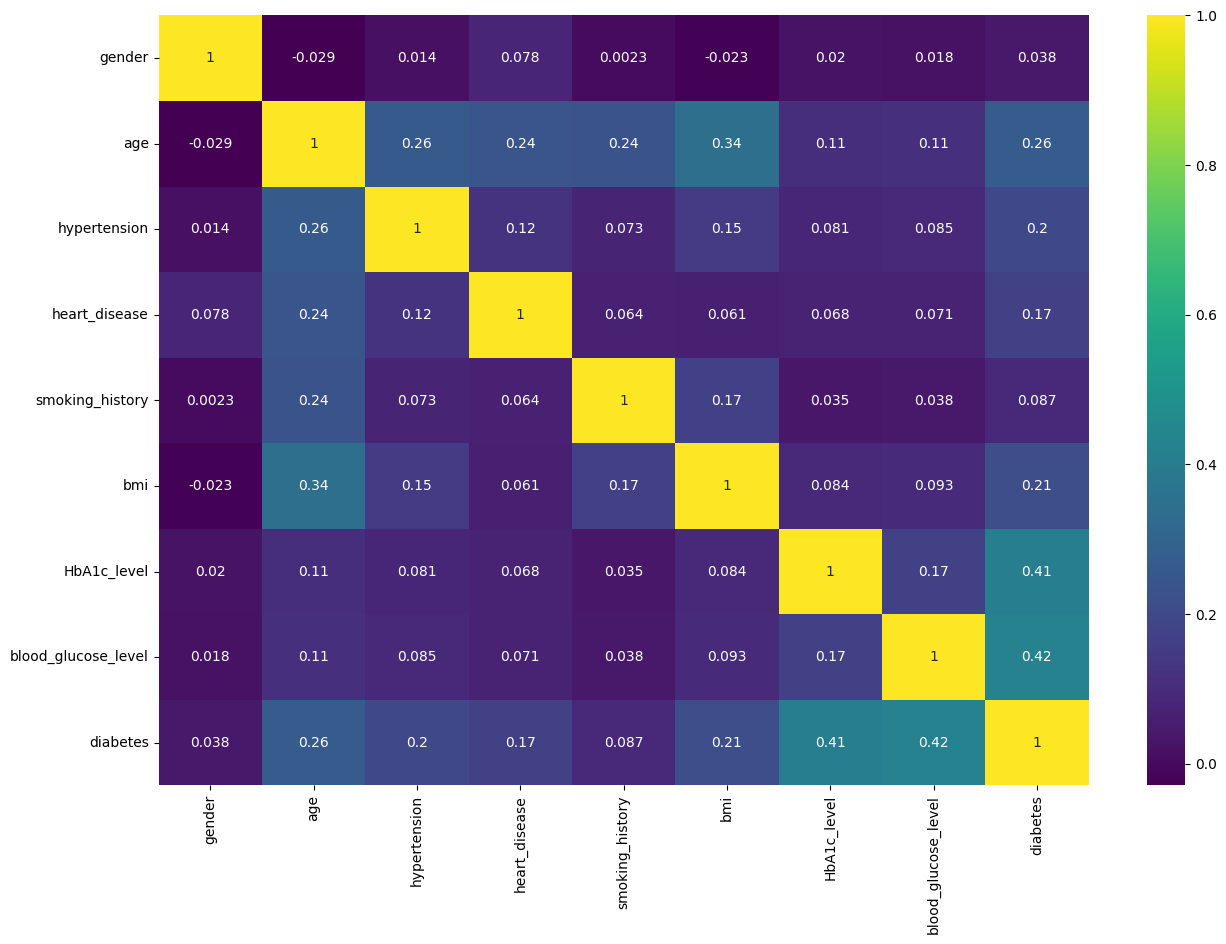

In [ ]:
plt.figure(figsize = (15, 10))
sns.heatmap(correlation, cmap = 'viridis', annot = True)

In [ ]:
label_correlation = correlation['diabetes'].drop('diabetes')
sorted_correlation = label_correlation.abs().sort_values(ascending = False)
print(sorted_correlation)

blood_glucose_level    0.424336
HbA1c_level            0.406408
age                    0.264927
bmi                    0.214932
hypertension           0.195710
heart_disease          0.170711
smoking_history        0.087470
gender                 0.037613
Name: diabetes, dtype: float64


Text(0, 0.5, 'Feature')

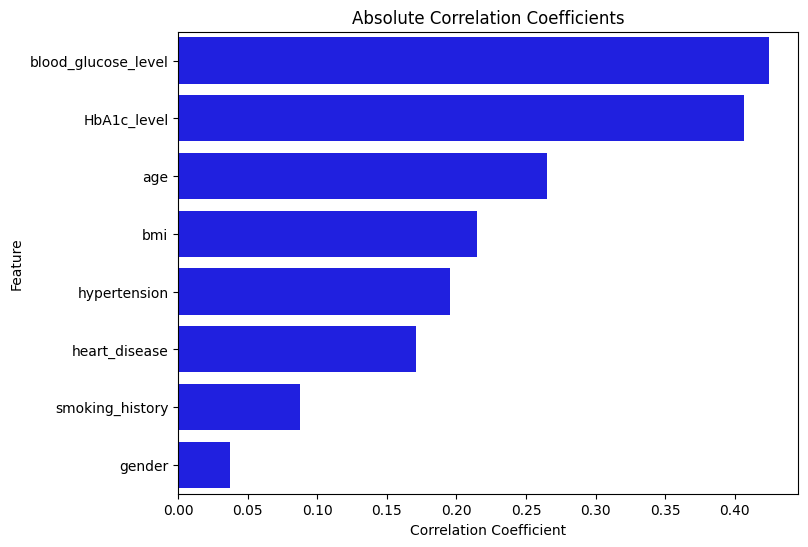

In [ ]:
plt.figure(figsize = (8, 6))
sns.barplot(x=sorted_correlation, y=sorted_correlation.index, color='blue')
plt.title('Absolute Correlation Coefficients')
plt.xlabel('Correlation Coefficient')
plt.ylabel('Feature')

# ***Split Data to Features and Label***

In [ ]:
features = df1[['gender', 'age', 'hypertension', 'heart_disease', 'smoking_history','bmi',
                'HbA1c_level', 'blood_glucose_level',]]

In [ ]:
features.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level
0,0,80.0,0,1,1,25.19,6.6,140
1,0,54.0,0,0,0,27.32,6.6,80
2,1,28.0,0,0,1,27.32,5.7,158
3,0,36.0,0,0,3,23.45,5.0,155
4,1,76.0,1,1,3,20.14,4.8,155


In [ ]:
label = df1['diabetes']

# ***Normalize the Dataset***

In [ ]:
# Normalize the data
from sklearn.preprocessing import StandardScaler
# scale the data to have zero mean and unit variance
scaler = StandardScaler()
features = scaler.fit_transform(features)

# ***Split Dataset***

In [ ]:
## Train test splitting 

from sklearn.model_selection import train_test_split 

x_train,x_test,y_train,y_test = train_test_split(features , label , test_size = 0.2)
print(f"x train shape : {x_train.shape}")
print(f"y train shape : {y_train.shape}")
print(f"x test shape : {x_test.shape}")
print(f"y test shape : {y_test.shape}")


x train shape : (76916, 8)
y train shape : (76916,)
x test shape : (19230, 8)
y test shape : (19230,)


# ***Dimensionality reduction using PCA from 8 to 6***

In [ ]:
# Dimensionality reduction using PCA
pca = PCA(n_components=6)
x_train_pca = pca.fit_transform(x_train)
x_test_pca = pca.transform(x_test)

In [ ]:
print(f"x train shape : {x_train_pca.shape}")
print(f"y train shape : {y_train.shape}")
print(f"x test shape : {x_test_pca.shape}")
print(f"y test shape : {y_test.shape}")


x train shape : (76916, 6)
y train shape : (76916,)
x test shape : (19230, 6)
y test shape : (19230,)


# ***When using PCA***

In [ ]:
LR_pca=LogisticRegression(random_state = 42)
LR_pca.fit(x_train_pca,y_train)

LogisticRegression(random_state=42)

# ***Save model***

In [ ]:
filename = 'Diabetes_Prediction_LR_with_PCA.h5'
pickle.dump(LR_pca, open(filename, 'wb'))

# ***Load the model and test this model***

In [ ]:
# Load the model from file
filename = 'Diabetes_Prediction_LR_with_PCA.h5'
loaded_model_pca = pickle.load(open(filename, 'rb'))

In [ ]:
y_pred_pca = loaded_model_pca.predict(x_test_pca)

In [ ]:
acc_score_pca = accuracy_score(y_test,y_pred_pca)
print(f"Classification Report : \n{classification_report(y_test,y_pred_pca)}")
print(f"Logistic Regression score when using PCA : {acc_score_pca*100:.3f}%")

Classification Report : 
              precision    recall  f1-score   support

           0       0.96      0.99      0.98     17545
           1       0.85      0.62      0.72      1685

    accuracy                           0.96     19230
   macro avg       0.91      0.81      0.85     19230
weighted avg       0.95      0.96      0.95     19230

Logistic Regression score when using PCA : 95.751%


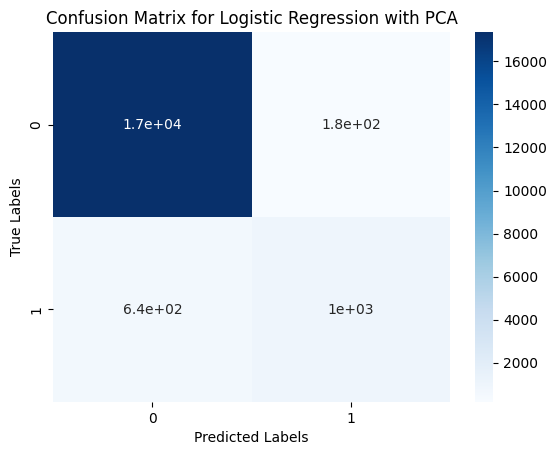

In [ ]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred_pca)

sns.heatmap(cm, annot=True, cmap='Blues')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix for Logistic Regression with PCA')
plt.show()

# ***Without using PCA***

In [ ]:
LR=LogisticRegression(random_state = 42)
LR.fit(x_train,y_train)

LogisticRegression(random_state=42)

# ***Save model***

In [ ]:
filename = 'Diabetes_Prediction_LR_without_PCA.h5'
pickle.dump(LR, open(filename, 'wb'))

# ***Load the model and test this model***

In [ ]:
# Load the model from file
filename = 'Diabetes_Prediction_LR_without_PCA.h5'
loaded_model = pickle.load(open(filename, 'rb'))

In [ ]:
y_pred = loaded_model.predict(x_test)

In [ ]:
acc_score = accuracy_score(y_test,y_pred)
print(f"Classification Report : \n{classification_report(y_test,y_pred)}")
print(f"Logistic Regression score without using PCA : {acc_score*100:.3f}%")

Classification Report : 
              precision    recall  f1-score   support

           0       0.96      0.99      0.98     17545
           1       0.84      0.62      0.71      1685

    accuracy                           0.96     19230
   macro avg       0.90      0.80      0.85     19230
weighted avg       0.95      0.96      0.95     19230

Logistic Regression score without using PCA : 95.642%


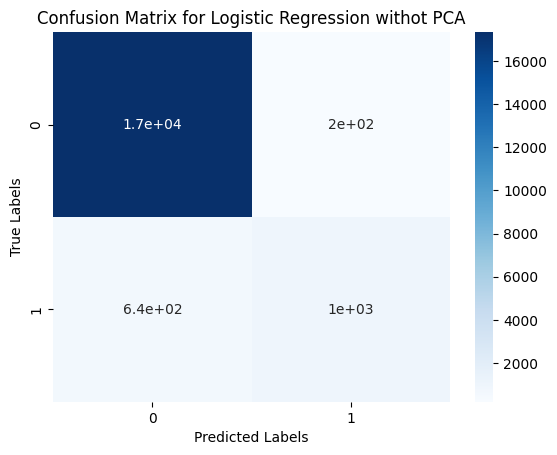

In [ ]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)

sns.heatmap(cm, annot=True, cmap='Blues')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix for Logistic Regression withot PCA')
plt.show()

# ***Try different number of features in PCA  on  Train and Test***

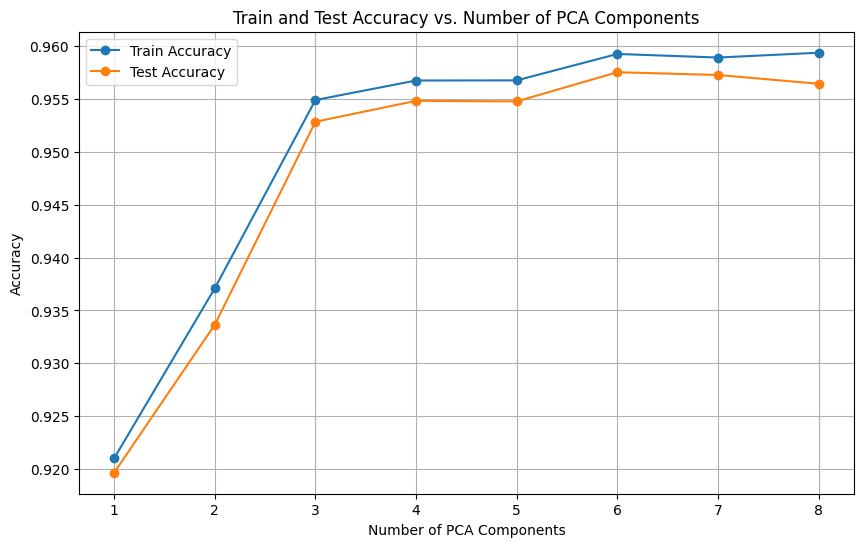

In [ ]:
train_accuracy = []
test_accuracy = []
component_values = [1, 2, 3, 4, 5, 6,7,8]  # Number of components used in PCA

for n in component_values:
    # Perform PCA with 'n' components
    pca = PCA(n_components=n)
    x_train_pca = pca.fit_transform(x_train)
    x_test_pca = pca.transform(x_test)

    # Train logistic regression model
    LR_pca = LogisticRegression(random_state=42)
    LR_pca.fit(x_train_pca, y_train)

    # Calculate training accuracy
    y_train_pred_pca = LR_pca.predict(x_train_pca)
    train_acc = accuracy_score(y_train, y_train_pred_pca)
    train_accuracy.append(train_acc)

    # Calculate testing accuracy
    y_test_pred_pca = LR_pca.predict(x_test_pca)
    test_acc = accuracy_score(y_test, y_test_pred_pca)
    test_accuracy.append(test_acc)

# Plotting the accuracy curves
plt.figure(figsize=(10, 6))
plt.plot(component_values, train_accuracy, marker='o', label='Train Accuracy')
plt.plot(component_values, test_accuracy, marker='o', label='Test Accuracy')
plt.title('Train and Test Accuracy vs. Number of PCA Components')
plt.xlabel('Number of PCA Components')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()
